In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [45]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [46]:
print("Training data head:\n", train_data.head())

Training data head:
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  


In [47]:
print("Missing values in training data:\n", train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].isnull().sum())


Missing values in training data:
 GrLivArea       0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64


In [48]:
# Handle missing values by imputing them with the median
train_data['GrLivArea'].fillna(train_data['GrLivArea'].median(), inplace=True)
train_data['BedroomAbvGr'].fillna(train_data['BedroomAbvGr'].median(), inplace=True)
train_data['FullBath'].fillna(train_data['FullBath'].median(), inplace=True)
train_data['SalePrice'].fillna(train_data['SalePrice'].median(), inplace=True)

In [49]:
# Check the shape of the training data after handling missing values
print("Shape of training data after filling missing values:", train_data.shape)

Shape of training data after filling missing values: (1460, 81)


In [50]:
# Handle missing values by imputing them with the median
train_data['GrLivArea'].fillna(train_data['GrLivArea'].median(), inplace=True)
train_data['BedroomAbvGr'].fillna(train_data['BedroomAbvGr'].median(), inplace=True)
train_data['FullBath'].fillna(train_data['FullBath'].median(), inplace=True)
train_data['SalePrice'].fillna(train_data['SalePrice'].median(), inplace=True)

In [51]:
# Handle missing values in the test set by imputing them with the median
test_data['GrLivArea'].fillna(test_data['GrLivArea'].median(), inplace=True)
test_data['BedroomAbvGr'].fillna(test_data['BedroomAbvGr'].median(), inplace=True)
test_data['FullBath'].fillna(test_data['FullBath'].median(), inplace=True)

In [52]:
# Check the shape of the test data after handling missing values
print("Shape of test data after filling missing values:", test_data.shape)

Shape of test data after filling missing values: (1459, 80)


In [53]:
X_train = train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y_train = train_data['SalePrice']


In [54]:
# Define the features for the testing set
X_test = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]

In [55]:
# Create a linear regression model
model = LinearRegression()

In [56]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# Make predictions on the test set
y_pred = model.predict(X_test)

Predictions:
[120100.81297664 139898.20827909 202611.4145861  ... 100482.39478483
 100386.04850582 243444.31507603]


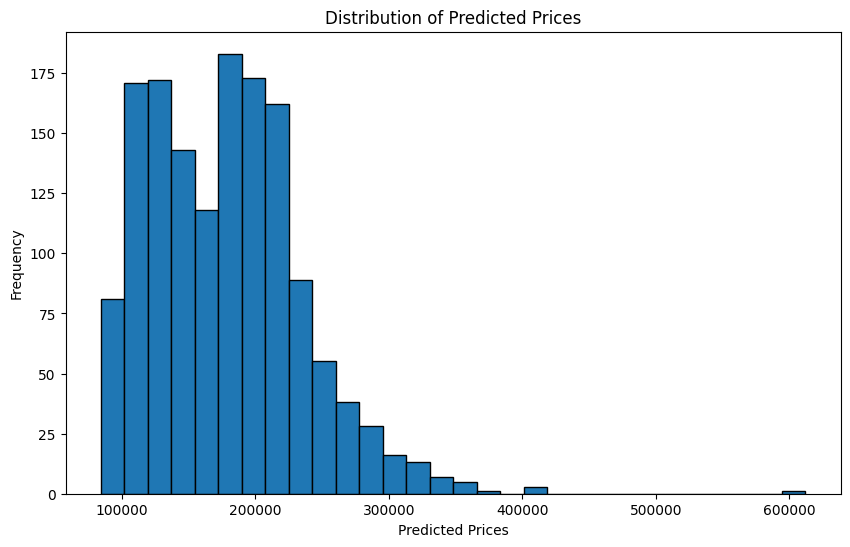

In [58]:
# If SalePrice is present in test_data, evaluate the model
if 'SalePrice' in test_data.columns:
    y_test = test_data['SalePrice']
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Visualize the results
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Actual vs Predicted Prices")
    plt.show()
else:
    print("Predictions:")
    print(y_pred)
    plt.figure(figsize=(10, 6))
    plt.hist(y_pred, bins=30, edgecolor='black')
    plt.xlabel("Predicted Prices")
    plt.ylabel("Frequency")
    plt.title("Distribution of Predicted Prices")
    plt.show()